<a href="https://colab.research.google.com/github/stefannevictoria/inteli-academy/blob/main/LimpezaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios de Limpeza de Dados com Pandas

### 1. Carregue o dataFrame e execute a função info para visualizar se existem dados nulos.

In [4]:
import pandas as pd
df = pd.read_csv('dados.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


### 2. Caso haja linhas duplicadas (idênticas) mantenha apenas uma delas.

In [6]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


Como foi mostrado que não há linhas duplicadas por meio da função duplicated(), não houve necessidade de excluir nenhuma linha.

### 3. Converta as datas (object) para datetime

In [7]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [8]:
print(df['Transaction Date'].isna().sum())

460


### 4. Execute alguns gráficos (podendo ser qualquer um, mas indico boxplots ou scatterplots) para visualizar se existem outliers nas variáveis numéricas

<Axes: >

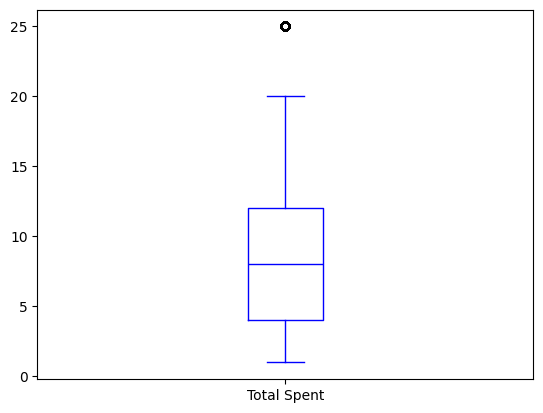

In [28]:
df.plot.box(y='Total Spent', color='blue')

<Axes: >

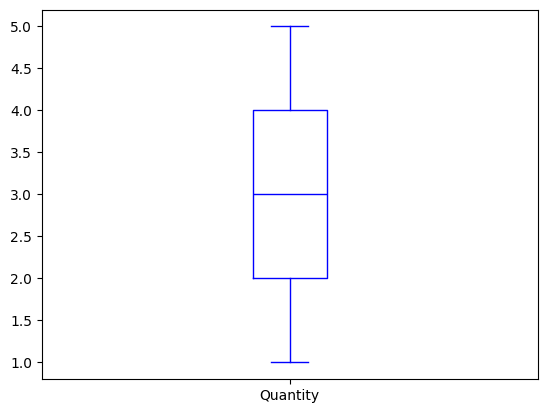

In [27]:
df.plot.box(y='Quantity', color='blue')

<Axes: >

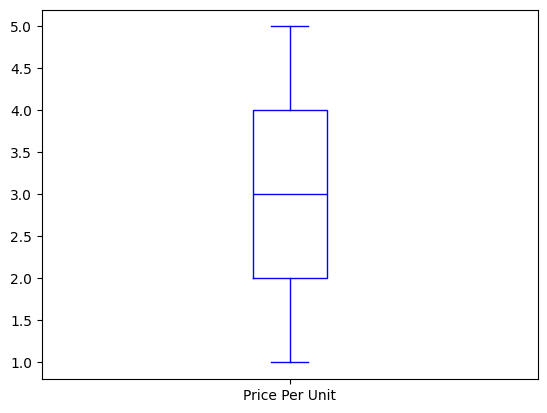

In [26]:
df.plot.box(y='Price Per Unit', color='blue')

### 5. Existem algumas linhas que têm valores corretos em “Quantity” e “Price per Unit” mas não em “Total Spent”. Para essas colunas, calcule o valor total e adicione caso esteja errado.

In [16]:
df['Total Correct'] = df['Quantity'] * df['Price Per Unit']

In [17]:
mask = df['Total Spent'].round(2) != df['Total Correct'].round(2)
df_incorretos = df[mask]

In [18]:
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Total Correct']

### 6. Se as colunas “Quantity” e “Price per Unit” tiverem valores errados ou ausentes, troque os pelos valores de média, mediana ou moda e depois calcule o “Total Spent”.

In [21]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mean())

In [23]:
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']

### 7. Agora que essas colunas só devem ter valores numéricos, converta elas de object para number

In [25]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

### 8. Tente identificar nas colunas numéricas outliers. Use gráficos para isso

<Axes: >

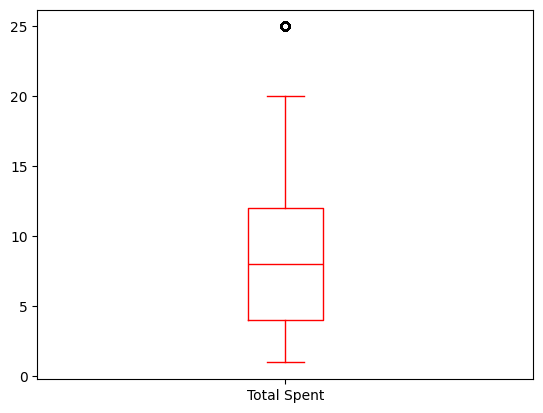

In [29]:
df.plot.box(y='Total Spent', color='red')

O boxplot acima representa a distribuição dos valores da variável `Total Spent`.
É possível observar a presença de outliers, representados pelos pontos fora dos limites superiores da caixa.
Esses valores estão significativamente acima da média, indicando que alguns clientes gastaram muito mais do que a maioria.

<Axes: >

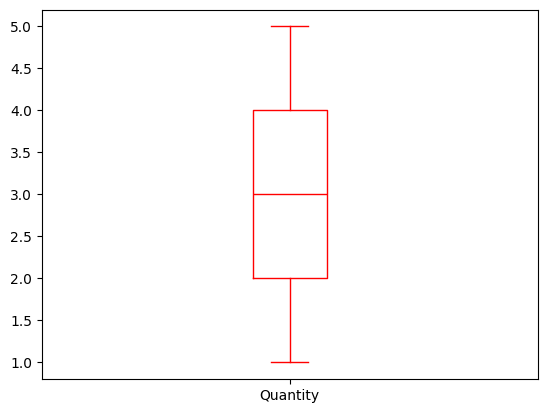

In [30]:
df.plot.box(y='Quantity', color='red')

O boxplot acima representa a distribuição dos valores da variável `Quantity`. É possível verificar que não há outliers.

<Axes: >

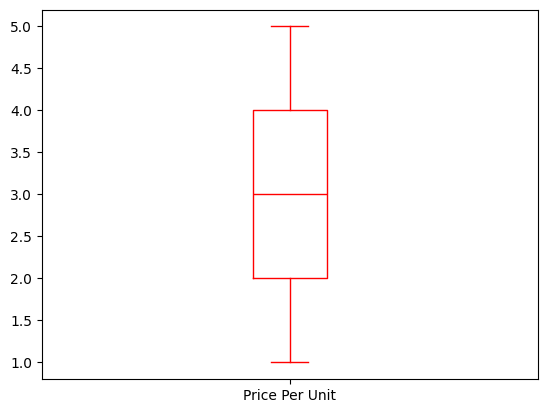

In [31]:
df.plot.box(y='Price Per Unit', color='red')

O boxplot acima representa a distribuição dos valores da variável `Price Per Unit`. É possível verificar que não há outliers.

### 9. O DF tem três variáveis categóricas, como “Item”, “Payment Method” e “Location” têm valores nulos com diferentes elementos, como: “ERROR”, NaN ou “UNKNOWN”, padronize esses valores nulos para facilitar o tratamento.

In [32]:
import numpy as np

In [34]:
df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

### 10. O DF tem três variáveis categóricas, como “Item”, “Payment Method” e “Location”. Faça a conversão delas em variáveis numéricas usando qualquer método de encoding. (dica: todos os valores nulos devem representar apenas uma categoria).

In [35]:
df['Item'] = pd.to_numeric(df['Item'], errors='coerce')
df['Payment Method'] = pd.to_numeric(df['Payment Method'], errors='coerce')
df['Location'] = pd.to_numeric(df['Location'], errors='coerce')

### 11. Agora que as colunas: “Item”, “Payment Method”, “Location”, “Quantity”, “Price per Unit” e “Total Spent” são numéricas, normalize elas.

In [38]:
from sklearn.preprocessing import MinMaxScaler
colunas_numericas = ['Quantity', 'Price Per Unit', 'Total Spent']
scaler = MinMaxScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])